# Brachistochorne Problem

We present the solution to the Brachistochone problem using gekko.

In [1]:
import numpy as np
import gekko as gk
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

Here we define the parameters and, in the following, the gekko formulation

In [2]:
xf = 4
yf = -2
n_points = 200

In [3]:
m = gk.GEKKO()
m.time = np.linspace(0, 1, n_points)

A = (0,0)
B = (xf,yf)

# Poition (x,y) of the object
x = m.Var(value=A[0], name='x')
y = m.Var(value=A[1], name='y')

# Velocity of the obtject
v = m.Var(value=0, name='velocity')

# Time variable
tf = m.FV(value=1.0, name='final time', lb=0.1, ub=100.0)
tf.STATUS = 1

# Control function
u = m.MV(value=0, name='acceleration',  lb=-10.0, ub=10.0)
u.STATUS = 1

# Gravity constant
g = m.Const(value=9.81665, name='g')

m.Equation(x.dt() == v*m.sin(u)*tf)
m.Equation(y.dt() == v*m.cos(u)*tf)
m.Equation(v.dt() == -g*m.cos(u)*tf)

obj_points = np.zeros(n_points)
obj_points[-1] = 1.0
final = m.Param(value=obj_points)

# Final constraints 
xf = m.Param()
yf = m.Param()
m.free(xf)
m.free(yf)
m.fix_final(xf, B[0])
m.fix_final(yf, B[1])

m.Equations([xf==x, yf==y])

# Optimal final time
m.Obj(tf)

# Solving
m.options.IMODE = 6
m.options.NODES = 6
m.options.MV_TYPE = 1
m.solve()

apm 201.39.147.24_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            1
   Variables    :            8
   Intermediates:            0
   Connections  :            6
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:           9752
 Number of total equations: -         9552
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            200
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

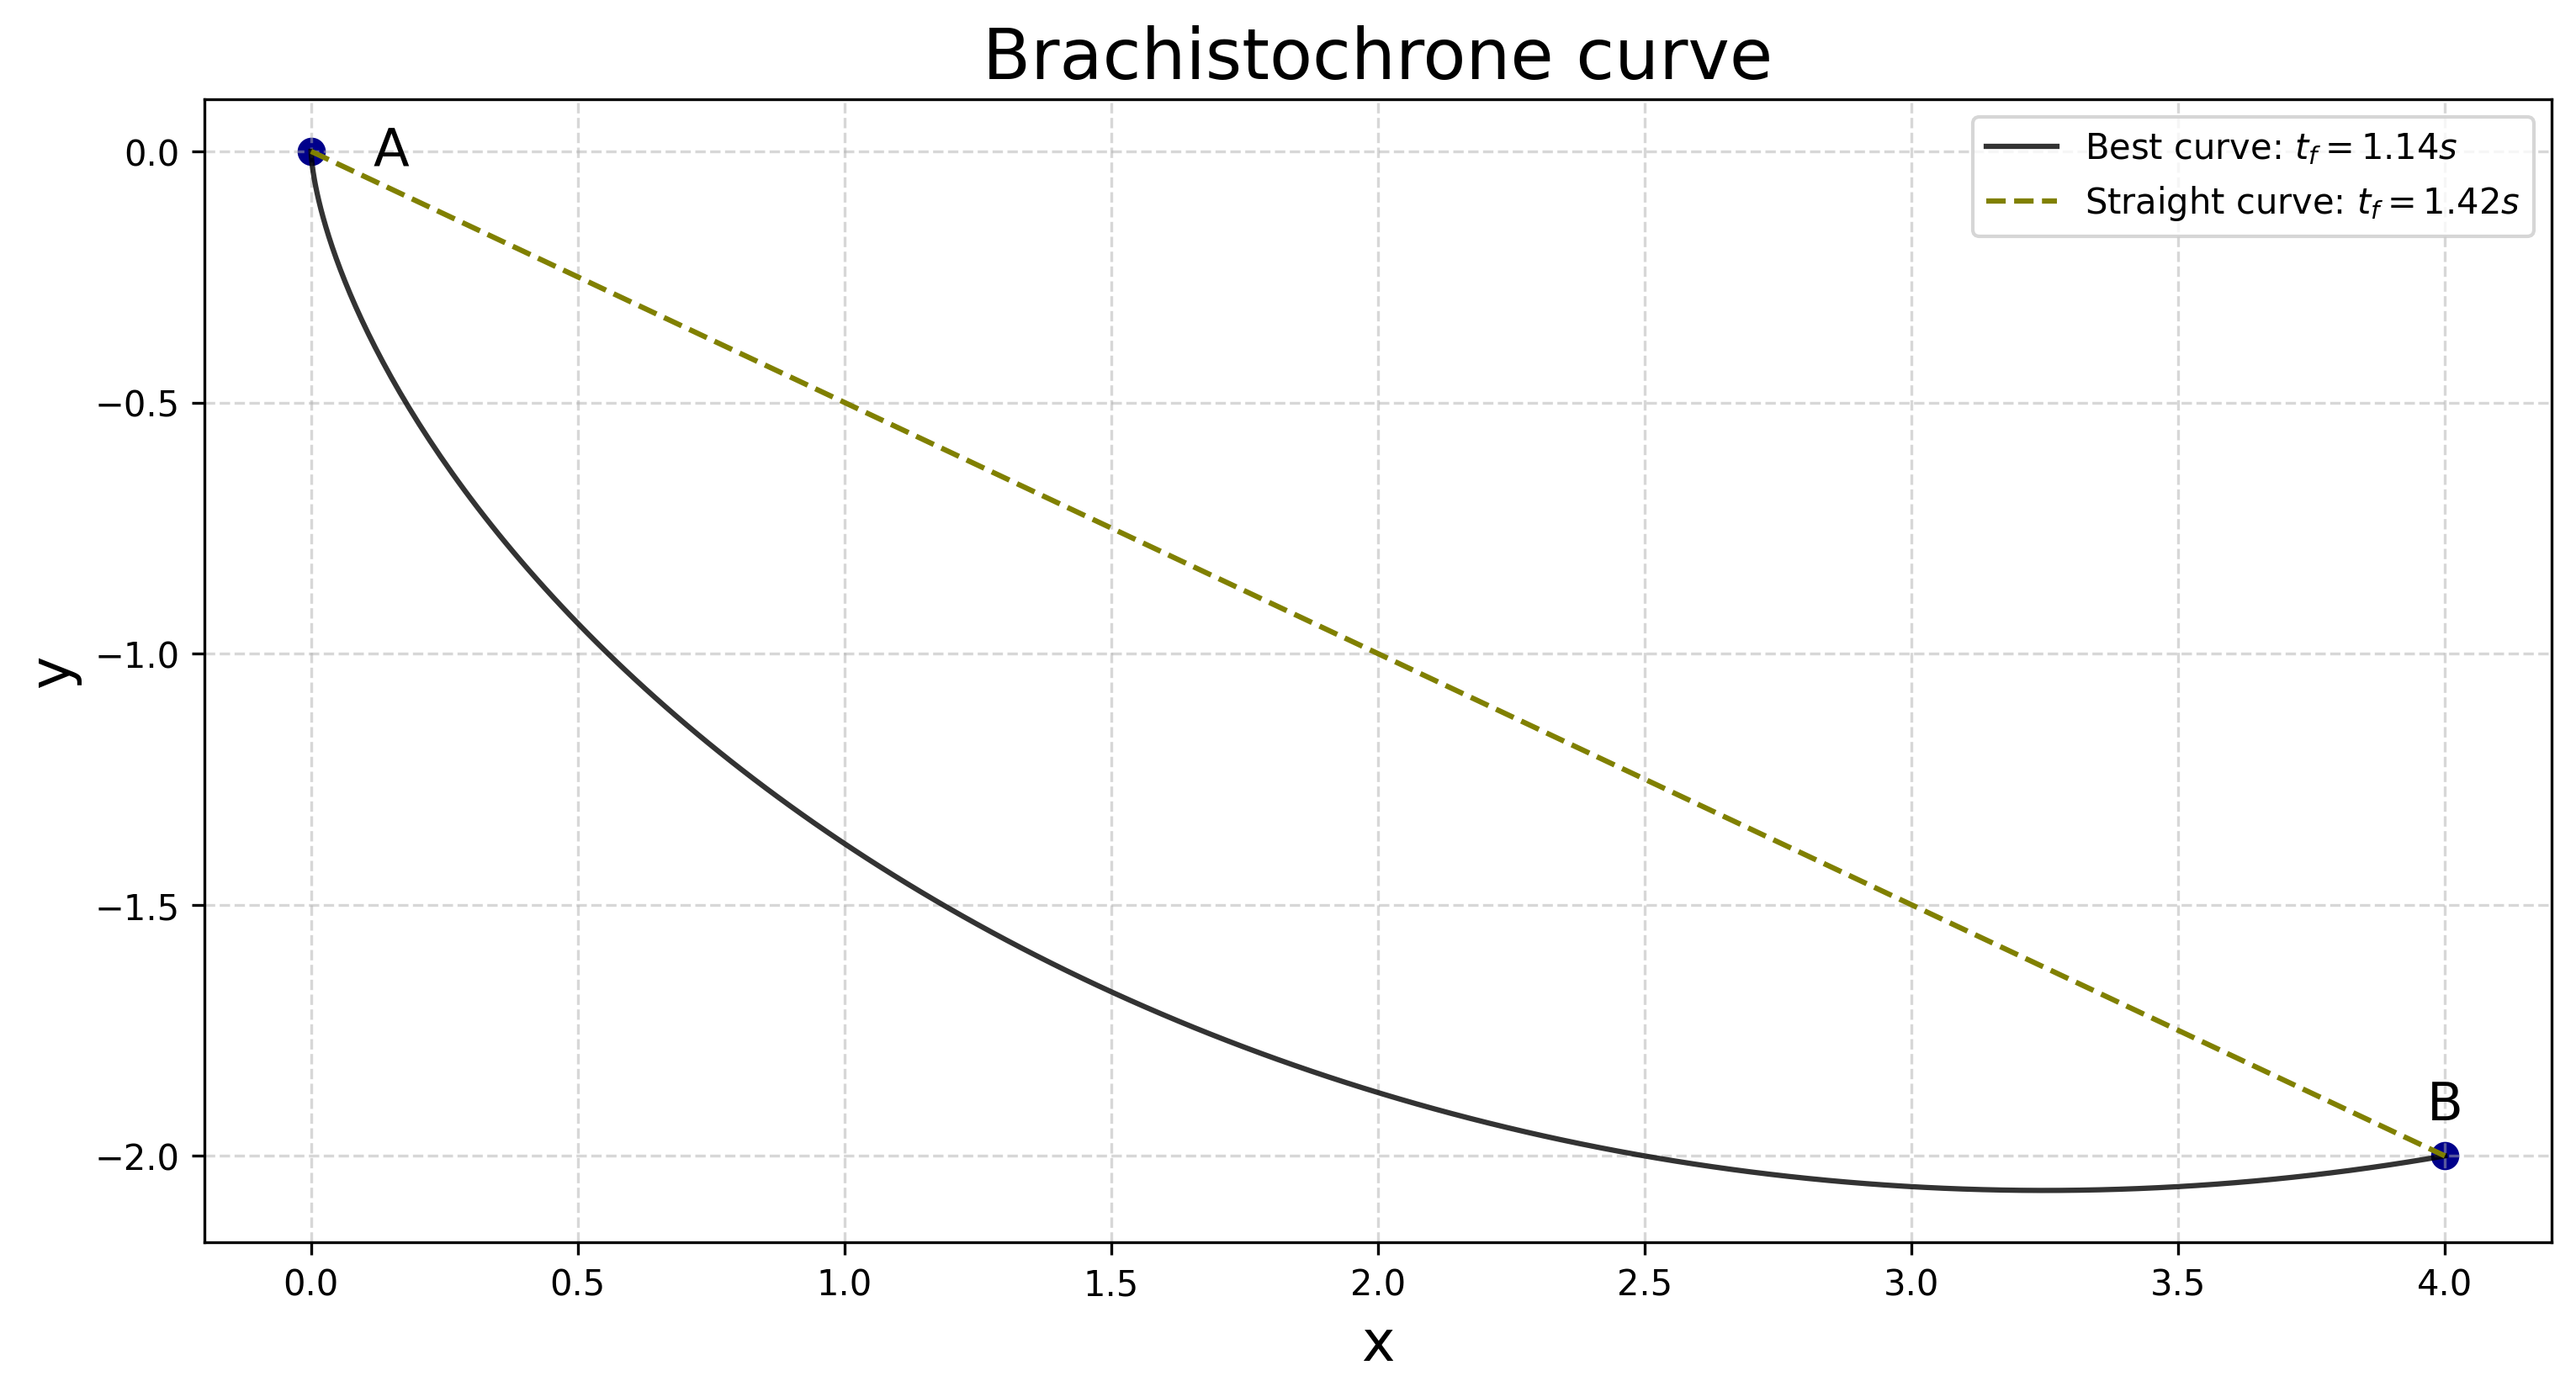

In [10]:
plt.figure(figsize=(12,6))
plt.grid(linestyle='--', alpha=0.5)

plt.plot(x.value,y.value, 'black', alpha=0.8, label=r'Best curve: $t_f = {:.2f}s$'.format(tf.value[0]))
plt.scatter([A[0], B[0]], [A[1], B[1]], s=50, color='darkblue')
plt.plot([A[0], B[0]], [A[1], B[1]], color='olive', linestyle='--', label='Straight curve: $t_f = {:.2f}s$'.format(1.4246))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.title('Brachistochrone curve', fontsize=20)

plt.text(0.15, 0, 'A', horizontalalignment='center', verticalalignment='center', fontsize=15)
plt.text(4, -1.9, 'B', horizontalalignment='center', verticalalignment='center', fontsize=15)

plt.savefig('../images/brachistochrone.pdf', bbox_inches='tight')
plt.show()